In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

In [2]:
#Import our data
df = pd.read_csv('Data\medical_data.csv')
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [5]:
#Quick verification of clean data
print(df.duplicated().sum())
print(df.isna().sum())

0
State                 5
Lat                   0
Lng                   0
Area                  5
Children              7
Age                   0
Income                0
Marital               5
Gender                5
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         5
HighBlood             0
Stroke                0
Complication_risk     5
Overweight            0
Arthritis             6
Diabetes              6
Hyperlipidemia        2
BackPain              8
Anxiety               2
Allergic_rhinitis     6
Reflux_esophagitis    0
Asthma                0
Services              5
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64


In [6]:
df.info()
#With 1,000 rows of data, it should be fine to just drop our rows with null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

In [7]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 930 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               930 non-null    object 
 1   Lat                 930 non-null    float64
 2   Lng                 930 non-null    float64
 3   Area                930 non-null    object 
 4   Children            930 non-null    float64
 5   Age                 930 non-null    int64  
 6   Income              930 non-null    float64
 7   Marital             930 non-null    object 
 8   Gender              930 non-null    object 
 9   ReAdmis             930 non-null    int64  
 10  VitD_levels         930 non-null    float64
 11  Doc_visits          930 non-null    int64  
 12  Full_meals_eaten    930 non-null    int64  
 13  vitD_supp           930 non-null    int64  
 14  Soft_drink          930 non-null    int64  
 15  Initial_admin       930 non-null    object 
 16  HighBloo

In [53]:
#Let's create a function to plot our distributions

def distribution_plot(column):
    target = df[column]

    mean=target.mean()
    median=target.median()
    std=target.std()
    std_plus1=mean+std
    std_minus1=mean-std
    std_plus2=mean+std+std
    std_minus2=mean-std-std

    fig,ax = plt.subplots(figsize=(14,10))
    g = sns.histplot(target, ax=ax, stat='probability')
    ylabels = ['{:,.0f}%'.format(y) for y in g.get_yticks()*100]
    g.set_yticklabels(ylabels)
    ax.axvline(mean, color="r", label=f'Mean = {mean:,.2f}')
    ax.axvline(median, color="orange", ls='--', label=f'Median = {median:,.2f}')
    ax.axvline(std_plus1, color="g",label=f'+1 std = {std_plus1:,.2f}')
    ax.axvline(std_minus1, color ="g", label = f'-1 std = {std_minus1:,.2f}')
    ax.axvspan(std_plus1, std_minus1, color="forestgreen", zorder=0, alpha=.5)
    ax.axvline(std_plus2, color="y",label=f'+2 std = {std_plus2:,.2f}')
    ax.axvline(std_minus2, color ="y", label = f'-2 std = {std_minus2:,.2f}')
    ax.axvspan(std_plus2, std_plus1, color="y", zorder=0, alpha=.3)
    ax.axvspan(std_minus2, std_minus1, color="y", zorder=0, alpha=.3)
    ax.set_title(f'{column}')
    ax.legend()
    plt.show()

In [55]:
warnings.filterwarnings('ignore')  ###Credit https://www.pythonpool.com/suppress-warnings-in-python/

### Task 1 - Plot and analyze VitD_levels

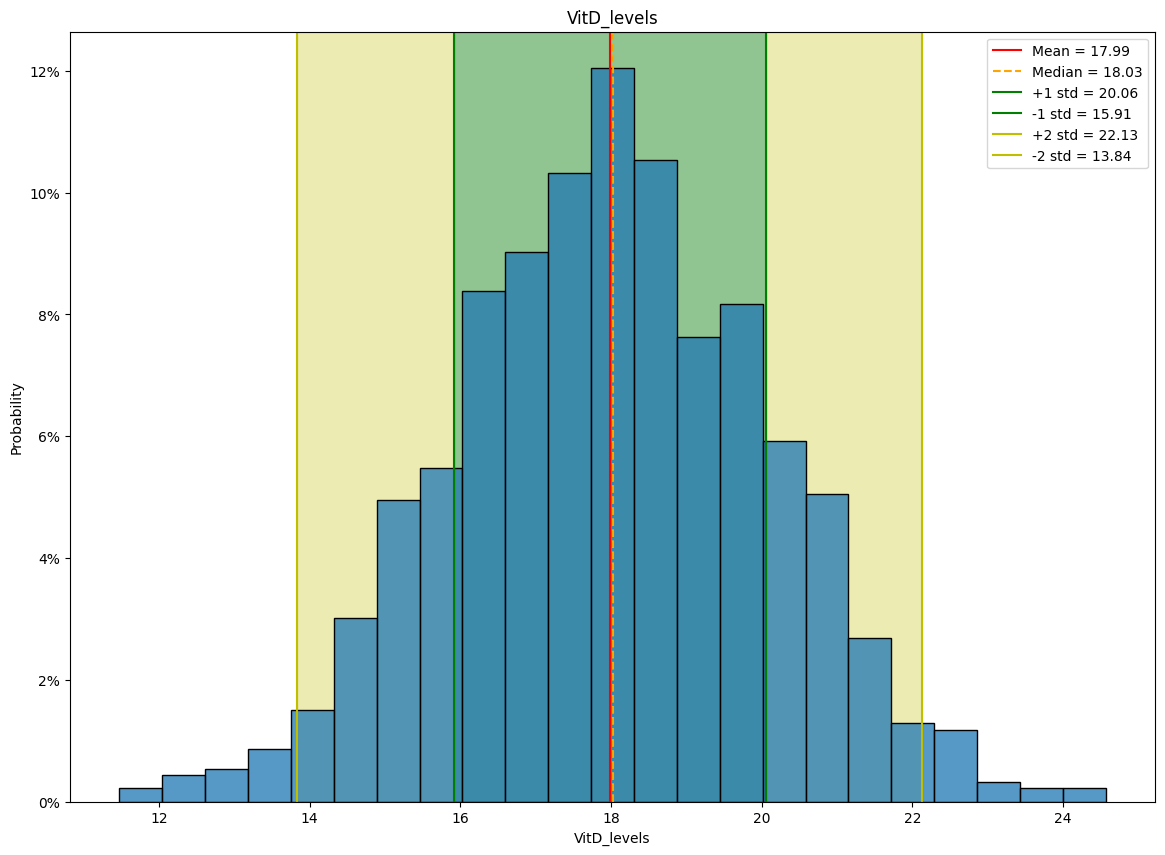

In [56]:
distribution_plot('VitD_levels')

### For VitD_levels it looks like we're dealing with a Continuous distribution, does not appear to have much of a positive of negative skew (maybe ever so slightly a positive skew), and we seem to have a Mesokurtic Kurtosis. We can verify this last piece with a quick scipy check

In [57]:
Kurtosis = stats.kurtosis(df['VitD_levels'], fisher=False)
Kurtosis
#Confirmed!

2.9695105662535095

### Task 2 - Plot and analyze Doc_visits

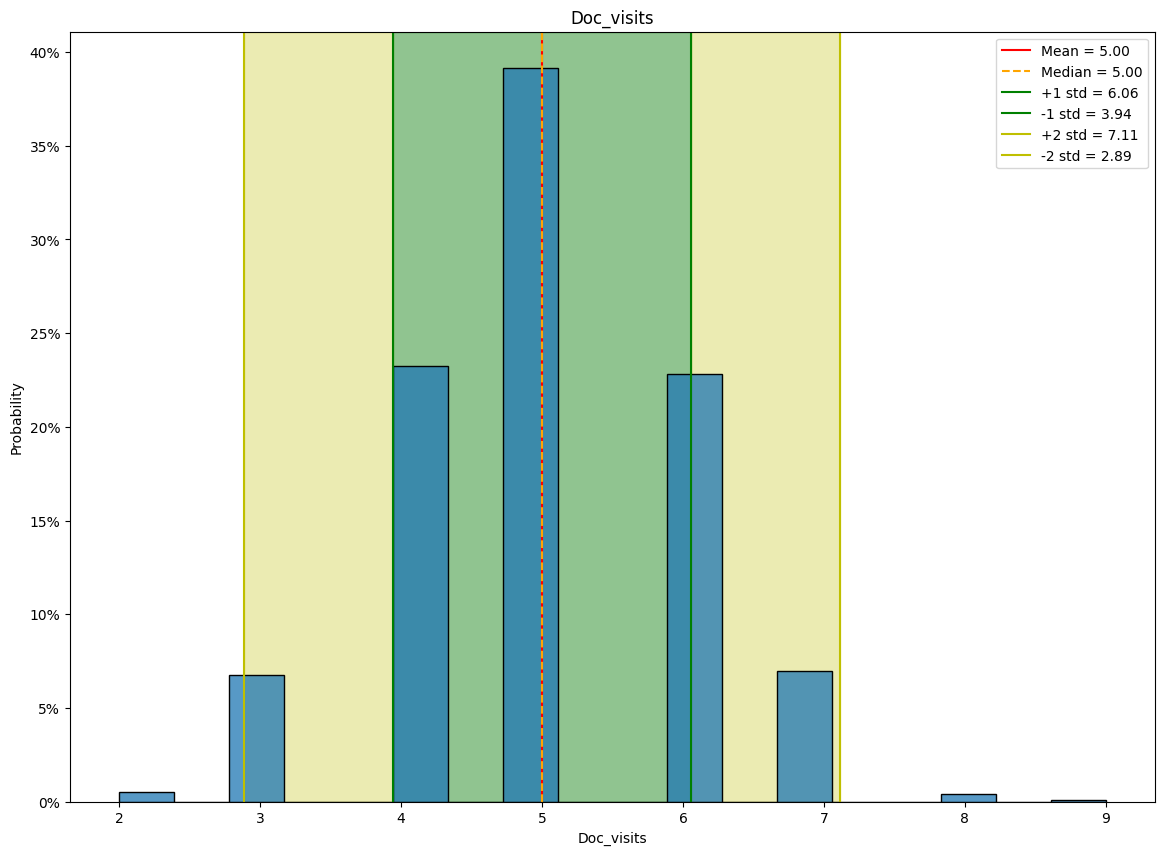

In [58]:
distribution_plot('Doc_visits')

### It's very clear right off the bat that we're dealing with Discrete Distribution for this feature. Again though, it doesn't have much of a positive or negative skew at all, and our Kurtosis seems very normal and falling into Mesokurtic. Again, let's use scipy to confirm! 

In [59]:
Kurtosis = stats.kurtosis(df['Doc_visits'], fisher=False)
Kurtosis
#Confirmed again! 

2.9929701943807308

### Task 3 - Plot and analyze TotalCharge

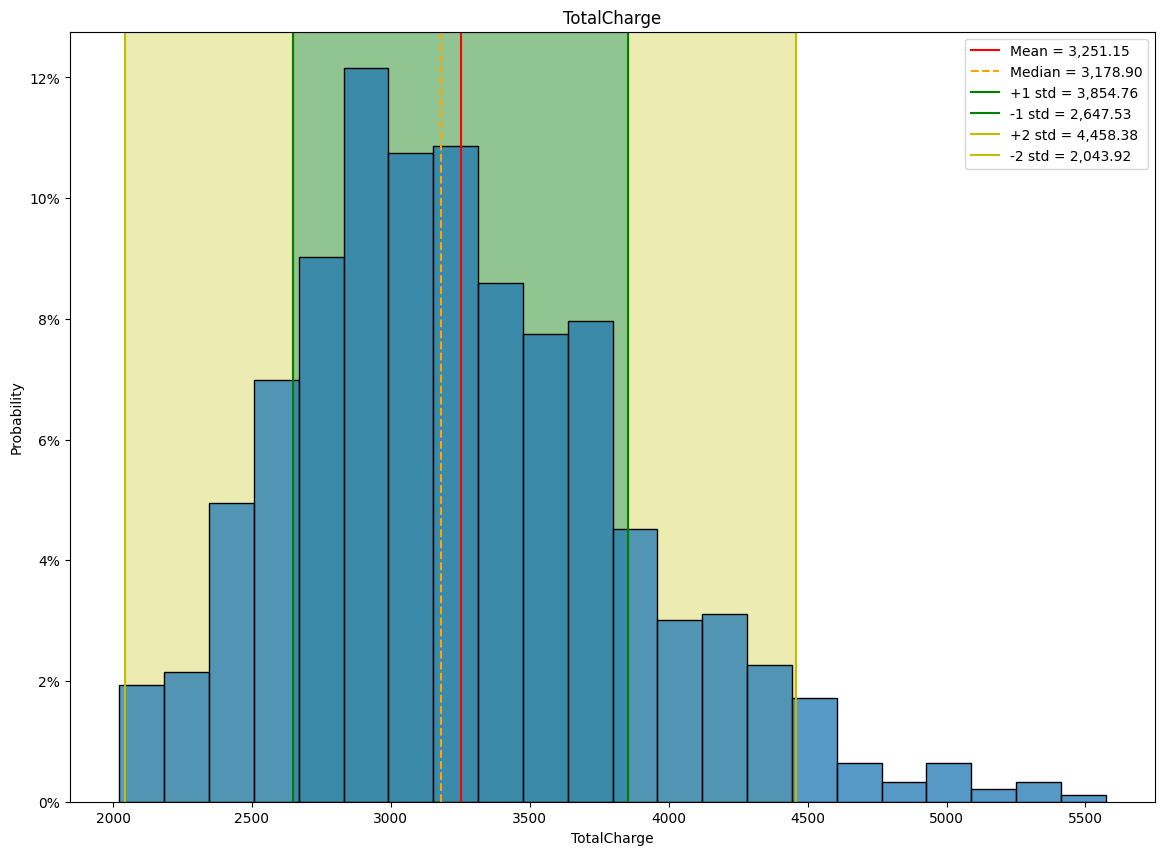

In [61]:
distribution_plot('TotalCharge')

### Looks like we're back to Continuous Distribution for our last feature. This one does have a noticeable positive skew to it (confirmed by the fact that our Mode is lower than both our Mean and Median). It still appears to have a fairly normal Kurtosis just like our others, and likely is Mesokurtic. Let's confirm though!

In [62]:
Kurtosis = stats.kurtosis(df['TotalCharge'], fisher=False)
Kurtosis
#Very close! One could argue that it's slightly more Leptokurtic than our other features, but not by much!

3.274018147040976